# Data Analysis

## Import the libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import seaborn 
import sklearn
import wordcloud
from nltk.corpus import stopwords
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mashagrutter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Get a first impression of the training, test and validation data

* Display the first rows of the training, test and validation data.

In [13]:
train = pd.read_csv('data/train.csv')
train.head(3)

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0


In [14]:
val = pd.read_csv('data/valid.csv')
val.head(3)

,id,premise,hypothesis,lang_abv,language,label
0,a7b0b9498c,"It's just the beginning!""",A great journey is about to begin!,en,English,1
1,00c0cdf348,Lạnh hơn và xa hơn bao giờ hết đã phát triển t...,Giọng của Chúa cảm thấy thật xa xôi và lạnh lẽo,vi,Vietnamese,0
2,a2a8b36437,"Κατά συνέπεια, οι κυβερνητικοί υπεύθυνοι λήψης...",Οι κυβερνητικοί εκπρόσωποι αρνούνται να αλλάξο...,el,Greek,2


In [15]:
test = pd.read_csv('data/test.csv')
test.head(3)

,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French


* display the shapes of the data

In [16]:
print("train shape: ", (train.shape))
print("validation shape: ", (val.shape))
print("test shape: ", (test.shape))

train shape:  (10908, 6)
validation shape:  (1212, 6)
test shape:  (5195, 5)


* display the langauges used in the datasets

In [17]:
print(train["language"].unique(),  "\n Therer are",  len(train["language"].unique()), "languages used in the training data.")

['English' 'French' 'Thai' 'Turkish' 'Urdu' 'Russian' 'Bulgarian' 'German'
 'Arabic' 'Chinese' 'Hindi' 'Swahili' 'Spanish' 'Vietnamese' 'Greek'] 
 Therer are 15 languages used in the training data.


In [18]:
print(val["language"].unique(),  "\n Therer are",  len(val["language"].unique()), "languages used in the validation data.")

['English' 'Vietnamese' 'Greek' 'Spanish' 'Chinese' 'Urdu' 'Russian'
 'Arabic' 'Hindi' 'French' 'Turkish' 'German' 'Bulgarian' 'Thai' 'Swahili'] 
 Therer are 15 languages used in the validation data.


In [19]:
print(test["language"].unique(),  "\n Therer are",  len(test["language"].unique()), "languages used in the test data.")

['Urdu' 'Arabic' 'French' 'Chinese' 'Russian' 'English' 'Swahili' 'German'
 'Greek' 'Turkish' 'Hindi' 'Vietnamese' 'Spanish' 'Bulgarian' 'Thai'] 
 Therer are 15 languages used in the test data.


## Statistics

### Look at the language distribution 

In [20]:
#look at the distirbution of one feature in the dataset
def data_distibution(data):
    labels, frequencies = np.unique(data, return_counts = True)
    colors = ['#355070','#6d597a','#b56576','#e56b6f', '#eaac8b']

    plt.figure(figsize = (7,7))
    plt.pie(frequencies,labels = labels, autopct = '%1.1f%%', colors=colors)
    return plt.show()

* in the training data

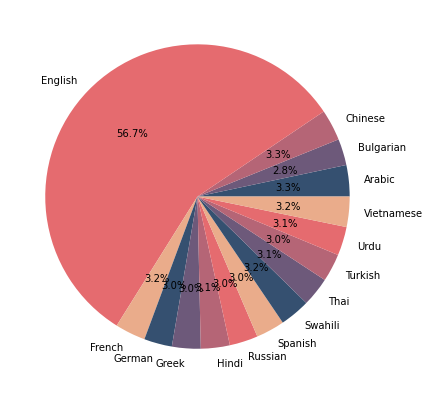

In [21]:
data_distibution(train.language.values)

* in the validation data

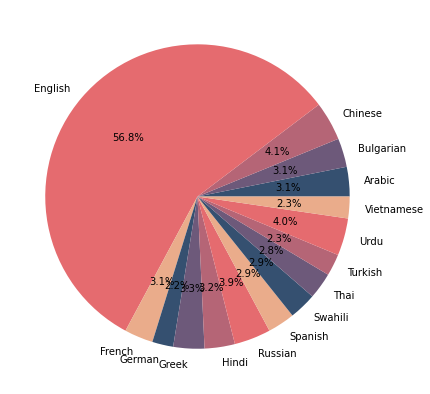

In [22]:
data_distibution(val.language.values)

* in the test data

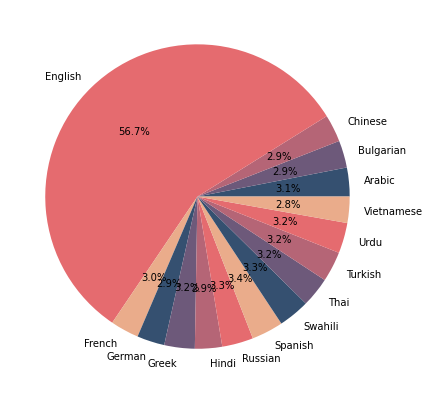

In [23]:
data_distibution(test.language.values)

### Look at the distribution of the labels neutral, entailment and contradiction

* in the training data

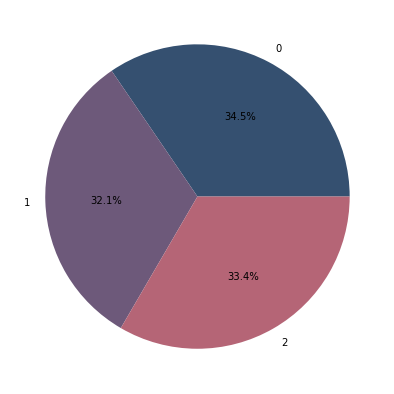

In [24]:
data_distibution(train.label.values)

* in the validation data

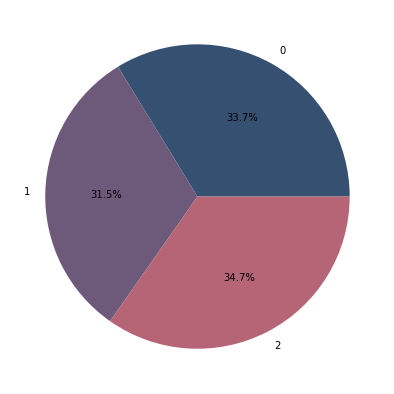

In [25]:
data_distibution(val.label.values)

### Number of characters present in the hypotheses vs. premises in English 

In [26]:
train_en = pd.read_csv('data/train_translated.csv')
test_en = pd.read_csv('data/test_translated.csv')
val_en = pd.read_csv('data/valid_translated.csv')

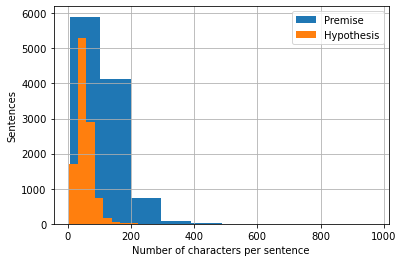

In [27]:
fig, ax = plt.subplots()
train_en['premise'].str.len().hist()
train_en['hypothesis'].str.len().hist()
ax.set_xlabel('Number of characters per sentence')
ax.set_ylabel('Sentences')
ax.legend(['Premise', 'Hypothesis'])
plt.show()

### Number of characters present in the hypotheses vs. premises for each label in English 

In [28]:
train_en_entail = train_en.loc[train['label'] == 0]
train_en_neutral = train_en.loc[train['label'] == 1]
train_en_contra = train_en.loc[train['label'] == 2]

* for english sentences with entailment

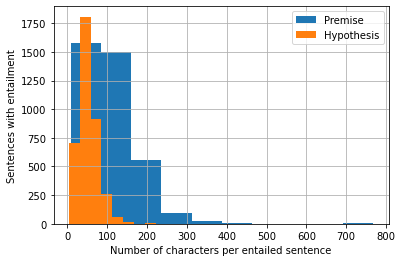

In [29]:
fig, ax = plt.subplots()
train_en_entail['premise'].str.len().hist()
train_en_entail['hypothesis'].str.len().hist()
ax.set_xlabel('Number of characters per entailed sentence')
ax.set_ylabel('Sentences with entailment')
ax.legend(['Premise', 'Hypothesis'])
plt.show()

* for neutral english sentences 

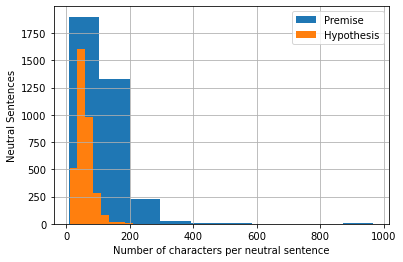

In [30]:
fig, ax = plt.subplots()
train_en_neutral['premise'].str.len().hist()
train_en_neutral['hypothesis'].str.len().hist()
ax.set_xlabel('Number of characters per neutral sentence')
ax.set_ylabel('Neutral Sentences')
ax.legend(['Premise', 'Hypothesis'])
plt.show()

* for english sentences with contradictional meaning

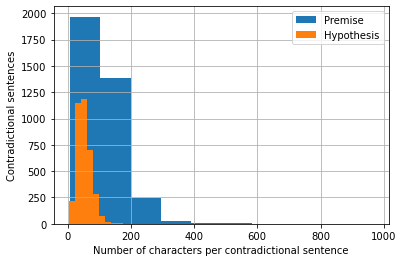

In [31]:
fig, ax = plt.subplots()
train_en_contra['premise'].str.len().hist()
train_en_contra['hypothesis'].str.len().hist()
ax.set_xlabel('Number of characters per contradictional sentence')
ax.set_ylabel('Contradictional sentences')
ax.legend(['Premise', 'Hypothesis'])
plt.show()

### Number of tokens in the hypotheses vs. premises in English 

In [32]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
    plt.xlabel('Number of tokens')
    plt.legend(['Premise', 'Hypothesis'])

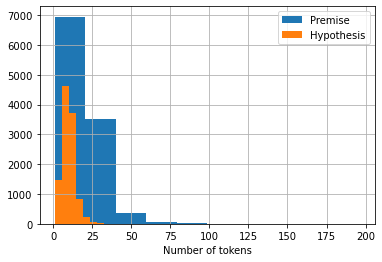

In [33]:
plot_word_number_histogram(train_en['premise'])
plot_word_number_histogram(train_en['hypothesis'])

### Number of tokens present in the hypotheses vs. premises for each label in English 

* for english sentences with entailment

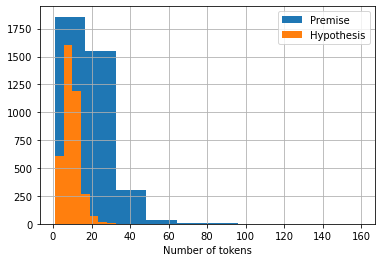

In [34]:
plot_word_number_histogram(train_en_entail['premise'])
plot_word_number_histogram(train_en_entail['hypothesis'])

* for neutral english sentences 

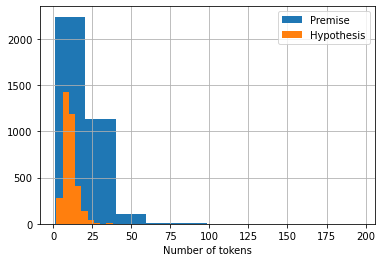

In [35]:
plot_word_number_histogram(train_en_neutral['premise'])
plot_word_number_histogram(train_en_neutral['hypothesis'])

* for english sentences with contradictional meaning

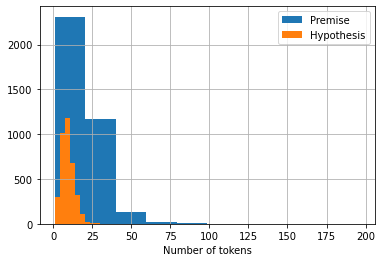

In [36]:
plot_word_number_histogram(train_en_contra['premise'])
plot_word_number_histogram(train_en_contra['hypothesis'])

### Average word length in the hypotheses vs. premises in English 

In [37]:
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()
    plt.xlabel('average word length')
    plt.legend(['Premise', 'Hypothesis'])       

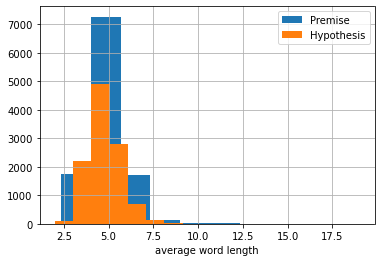

In [38]:
plot_word_length_histogram(train_en['premise'])
plot_word_length_histogram(train_en['hypothesis'])

### Average word length in the hypotheses vs. premises for each label in English

* for english sentences with entailment 

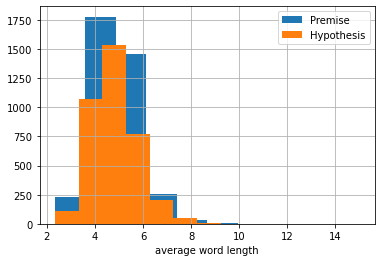

In [39]:
plot_word_length_histogram(train_en_entail['premise'])
plot_word_length_histogram(train_en_entail['hypothesis'])

* for neutral english sentences 

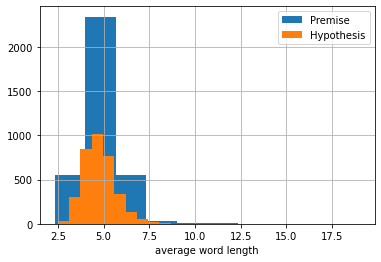

In [40]:
plot_word_length_histogram(train_en_neutral['premise'])
plot_word_length_histogram(train_en_neutral['hypothesis'])

* for english sentences with contradictional meaning

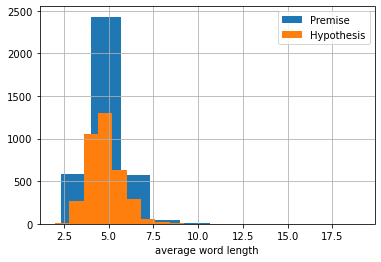

In [41]:
plot_word_length_histogram(train_en_contra['premise'])
plot_word_length_histogram(train_en_contra['hypothesis'])

### Frequently used stopwords in the hypotheses 

In [42]:
stop = set(stopwords.words('english'))

In [43]:
corpus=[]
new= train_en['hypothesis'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [44]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

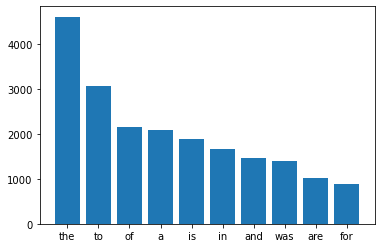

In [45]:
plot_top_stopwords_barchart(train_en['hypothesis'])

### Frequently used stopwords in the premises 

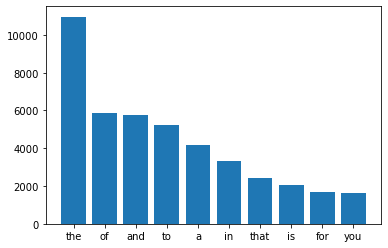

In [46]:
plot_top_stopwords_barchart(train_en['premise'])

### Frequently used words in the hypotheses

In [47]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

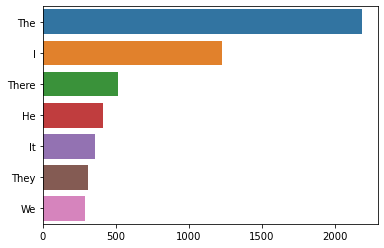

In [48]:
plot_top_non_stopwords_barchart(train_en['hypothesis'])

### Frequently used words in the premises

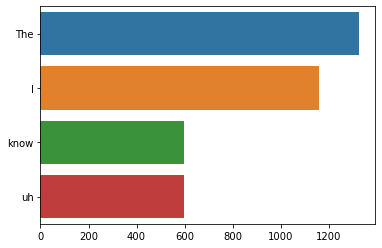

In [49]:
plot_top_non_stopwords_barchart(train_en['premise'])

### Most frequent n-grams in the hypotheses

In [50]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

* two grams

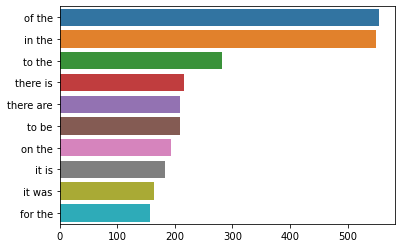

In [51]:
plot_top_ngrams_barchart(train_en['hypothesis'],2)

* three grams

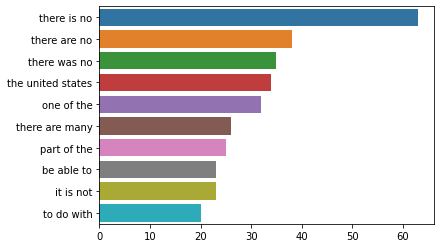

In [52]:
plot_top_ngrams_barchart(train_en['hypothesis'],3)

* four grams

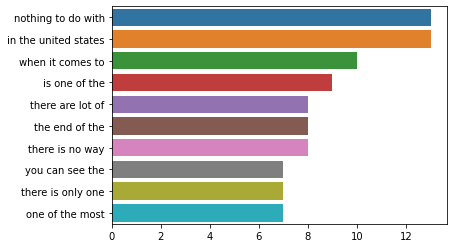

In [53]:
plot_top_ngrams_barchart(train_en['hypothesis'],4)

### Most frequent n-grams in the premises

* two grams

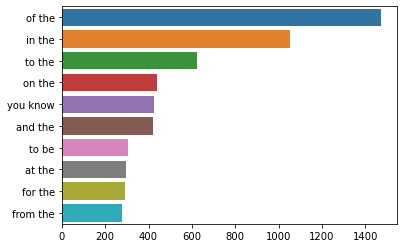

In [54]:
plot_top_ngrams_barchart(train_en['premise'],2)

* three grams

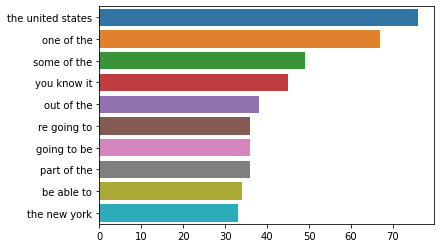

In [55]:
plot_top_ngrams_barchart(train_en['premise'],3)

* four grams

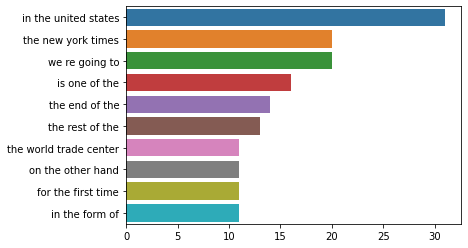

In [56]:
plot_top_ngrams_barchart(train_en['premise'],4)

### Word cloud for the premises


In [57]:
def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mashagrutter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


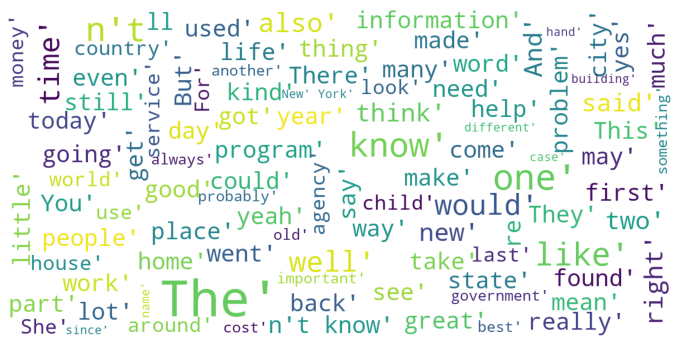

In [58]:
plot_wordcloud(train_en['premise'])

### Word cloud for the hypotheses

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mashagrutter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


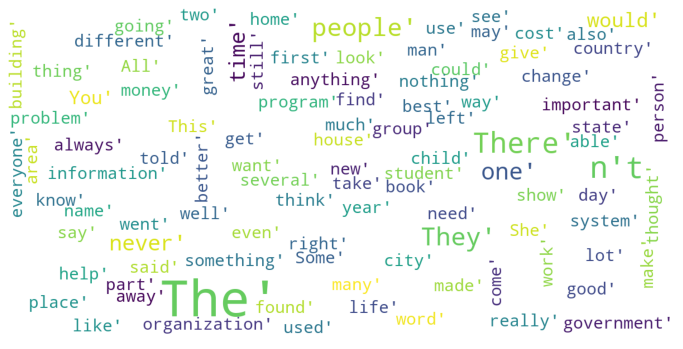

In [59]:
plot_wordcloud(train_en['hypothesis'])

### Sources

https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools